<a href="https://colab.research.google.com/github/amscally-dsci/Cohort-18-Projects/blob/main/Copy_of_3d_Data_Cleaning_and_EDA_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [ ]:
url = "http://ddc-datascience.s3-website-us-west-1.amazonaws.com/winequality-red.csv"
wine_data = pd.read_csv(url)

In [ ]:
wine_data.shape

(1599, 12)

In [ ]:
wine_data.size

19188

In [ ]:
f"{wine_data.size:,}"

'19,188'

## Understand the Data

In [ ]:
# Look at the first five rows
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,NaN,0.56,9.4,5


In [ ]:
# Get info about each column
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1598 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Count the number of nulls then multiply by some large number to make them stand out
wine_data.isnull().sum()*1000

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,1000
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,1000
sulphates,0


In [ ]:
# Count the number of nulls then sort to group counts
wine_data.isnull().sum().sort_values()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
chlorides,0
total sulfur dioxide,0
free sulfur dioxide,0
density,0
sulphates,0
quality,0
alcohol,0


Notice that there is one null vlaue for pH and residual sugar.

In [ ]:
# Get summary statistics about each column
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.333196,2.539393,0.087467,15.874922,46.467792,0.996747,3.310989,0.658149,10.422983,5.636023
std,1.741096,0.179060,2.501598,1.410174,0.047065,10.460157,32.895324,0.001887,0.154355,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,100.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
type(wine_data.describe())

pandas.core.frame.DataFrame

In [ ]:
wine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.333196,2.501598,0.00000,0.0900,0.26000,0.420000,100.00000
residual sugar,1598.0,2.539393,1.410174,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1598.0,3.310989,0.154355,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
# See the unique values in the quality column
wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
# Count the number of unique values in the quality column
wine_data['quality'].nunique()

6

In [ ]:
len(wine_data['quality'].unique())

6

In [ ]:
# See how many observations there are for each unique value in the quality column
wine_data['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
wine_data['quality'].value_counts(normalize=True)*100

,proportion
quality,
5,42.589118
6,39.899937
7,12.445278
4,3.314572
8,1.125704
3,0.625391


## Clean the Data

We saw above that there are two columns that have nulls/NAs. Let's drop the rows that have NAs.

In [ ]:
# Before doing any cleaning, let's make a copy of our data frame
wine_clean = wine_data.copy()

In [ ]:
# Drop the rows with NAs
wine_clean.dropna(inplace = True)

In [ ]:
# Alternate, doing both steps in one
# wine_clean = wine_data.dropna()

In [ ]:
# Verify they NAs were dropped
wine_clean.isnull().sum()*1000

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Let's say we don't want to include the density or sulphate columns in our data, so we will drop them.

In [ ]:
# View column names
wine_clean.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Drop the density and sulphate column
wine_clean.drop(columns = ['density', 'sulphates'], inplace = True)

In [ ]:
# Verify it was dropped
wine_clean.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Sort list using Python functions
sorted(list(wine_clean.columns))

['alcohol',
 'chlorides',
 'citric acid',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'quality',
 'residual sugar',
 'total sulfur dioxide',
 'volatile acidity']

In [ ]:
# Sort list using Pandas methods
wine_clean.columns.sort_values().to_list()

['alcohol',
 'chlorides',
 'citric acid',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'quality',
 'residual sugar',
 'total sulfur dioxide',
 'volatile acidity']

In [ ]:
wine_clean.isnull().sum()*1000

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
pH,0
alcohol,0
quality,0


In [ ]:
( wine_clean.isnull().sum()*1000 ).sort_index()

,0
alcohol,0
chlorides,0
citric acid,0
fixed acidity,0
free sulfur dioxide,0
pH,0
quality,0
residual sugar,0
total sulfur dioxide,0
volatile acidity,0


Finally, residual sugar is currently in g but I want it in mg. So I am going to multiply each value in the residual sugar column by 1000.

In [ ]:
wine_clean['residual sugar'].head()

,residual sugar
0,1.9
1,2.6
2,2.3
3,1.9
5,1.8


In [ ]:
# Multiply each value by 1000
wine_clean['residual sugar (mg)'] = wine_clean['residual sugar']*1000

In [ ]:
# Confirm it worked
wine_clean[['residual sugar','residual sugar (mg)']].head()

,residual sugar,residual sugar (mg)
0,1.9,1900.0
1,2.6,2600.0
2,2.3,2300.0
3,1.9,1900.0
5,1.8,1800.0


In [ ]:
wine_clean['residual sugar'] = wine_clean['residual sugar (mg)']
wine_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,alcohol,quality,residual sugar (mg)
0,7.4,0.70,0.00,1900.0,0.076,11.0,34.0,3.51,9.4,5,1900.0
1,7.8,0.88,0.00,2600.0,0.098,25.0,67.0,3.20,9.8,5,2600.0
2,7.8,0.76,0.04,2300.0,0.092,15.0,54.0,3.26,9.8,5,2300.0
3,11.2,0.28,0.56,1900.0,0.075,17.0,60.0,3.16,9.8,6,1900.0
5,7.4,0.66,0.00,1800.0,0.075,13.0,40.0,3.51,9.4,5,1800.0


In [ ]:
wine_clean.drop( columns=["residual sugar (mg)"], inplace=True)

In [ ]:
wine_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,alcohol,quality
0,7.4,0.70,0.00,1900.0,0.076,11.0,34.0,3.51,9.4,5
1,7.8,0.88,0.00,2600.0,0.098,25.0,67.0,3.20,9.8,5
2,7.8,0.76,0.04,2300.0,0.092,15.0,54.0,3.26,9.8,5
3,11.2,0.28,0.56,1900.0,0.075,17.0,60.0,3.16,9.8,6
5,7.4,0.66,0.00,1800.0,0.075,13.0,40.0,3.51,9.4,5


## Generate Summary Statistics

In [ ]:
# Get summary statistics for each column
wine_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,alcohol,quality
count,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000
mean,8.320539,0.527661,0.333431,2539.793363,0.087457,15.882279,46.486537,3.311021,10.424452,5.636819
std,1.741986,0.179108,2.503151,1410.524492,0.047089,10.464580,32.911540,0.154398,1.065512,0.807761
min,4.600000,0.120000,0.000000,900.000000,0.012000,1.000000,6.000000,2.740000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1900.000000,0.070000,7.000000,22.000000,3.210000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2200.000000,0.079000,14.000000,38.000000,3.310000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2600.000000,0.090000,21.000000,62.000000,3.400000,11.100000,6.000000
max,15.900000,1.580000,100.000000,15500.000000,0.611000,72.000000,289.000000,4.010000,14.900000,8.000000


In [ ]:
wine_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1597.0,8.320539,1.741986,4.600,7.10,7.900,9.20,15.900
volatile acidity,1597.0,0.527661,0.179108,0.120,0.39,0.520,0.64,1.580
citric acid,1597.0,0.333431,2.503151,0.000,0.09,0.260,0.42,100.000
residual sugar,1597.0,2539.793363,1410.524492,900.000,1900.00,2200.000,2600.00,15500.000
chlorides,1597.0,0.087457,0.047089,0.012,0.07,0.079,0.09,0.611
free sulfur dioxide,1597.0,15.882279,10.464580,1.000,7.00,14.000,21.00,72.000
total sulfur dioxide,1597.0,46.486537,32.911540,6.000,22.00,38.000,62.00,289.000
pH,1597.0,3.311021,0.154398,2.740,3.21,3.310,3.40,4.010
alcohol,1597.0,10.424452,1.065512,8.400,9.50,10.200,11.10,14.900
quality,1597.0,5.636819,0.807761,3.000,5.00,6.000,6.00,8.000


In [ ]:
wine_clean.describe().transpose().loc["alcohol"]["mean"]

np.float64(10.424452097683155)

In [ ]:
# Calculate the mean of a single column
wine_clean['alcohol'].mean()

np.float64(10.424452097683155)

## Plot the data (univariate)

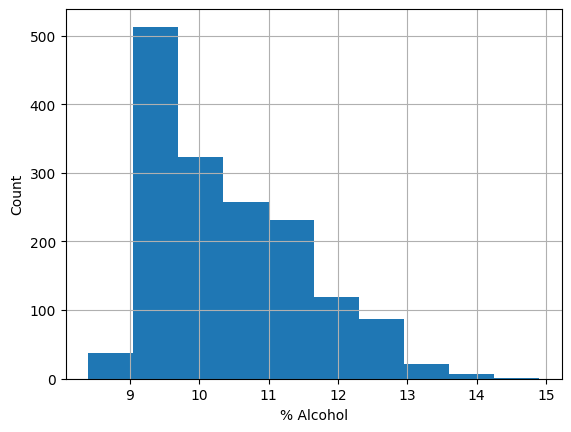

In [ ]:
wine_clean['alcohol'].hist()
plt.xlabel('% Alcohol')
plt.ylabel('Count') ;

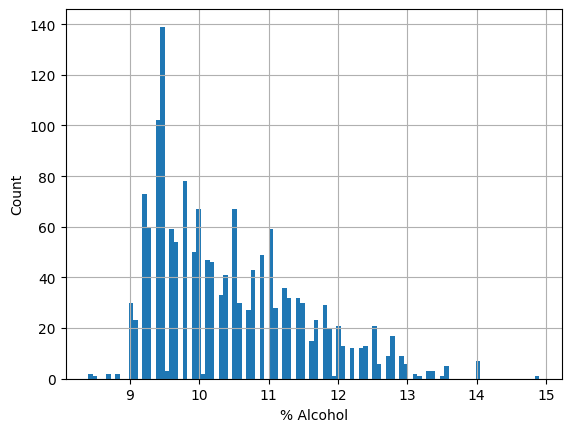

In [ ]:
wine_clean['alcohol'].hist(bins = 100)
plt.xlabel('% Alcohol')
plt.ylabel('Count') ;

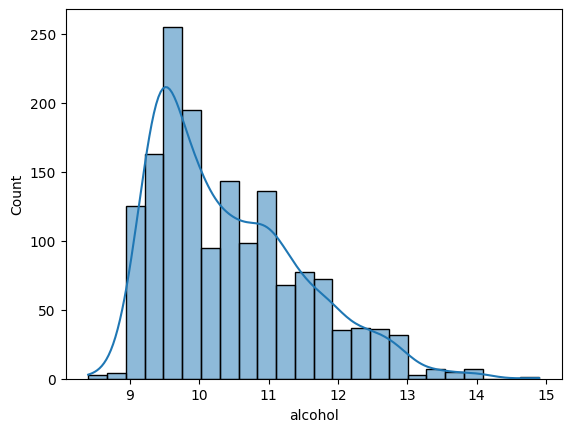

In [ ]:
sns.histplot(x = wine_clean['alcohol'], kde = True) ;

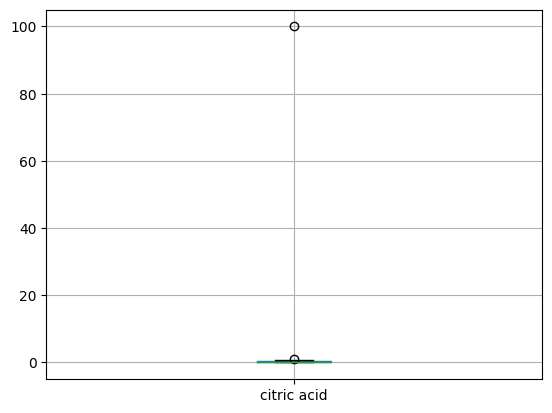

In [ ]:
wine_clean.boxplot(column = 'citric acid') ;

What's going on here? It looks like there might be a large outlier. Could we have identified without graphing? Let's take a look.



In [ ]:
wine_clean_stats = wine_clean.describe().transpose()
wine_clean_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1597.0,8.320539,1.741986,4.600,7.10,7.900,9.20,15.900
volatile acidity,1597.0,0.527661,0.179108,0.120,0.39,0.520,0.64,1.580
citric acid,1597.0,0.333431,2.503151,0.000,0.09,0.260,0.42,100.000
residual sugar,1597.0,2539.793363,1410.524492,900.000,1900.00,2200.000,2600.00,15500.000
chlorides,1597.0,0.087457,0.047089,0.012,0.07,0.079,0.09,0.611
free sulfur dioxide,1597.0,15.882279,10.464580,1.000,7.00,14.000,21.00,72.000
total sulfur dioxide,1597.0,46.486537,32.911540,6.000,22.00,38.000,62.00,289.000
pH,1597.0,3.311021,0.154398,2.740,3.21,3.310,3.40,4.010
alcohol,1597.0,10.424452,1.065512,8.400,9.50,10.200,11.10,14.900
quality,1597.0,5.636819,0.807761,3.000,5.00,6.000,6.00,8.000


In [ ]:
# Range stats
wine_clean_stats["IQR"]     = ( wine_clean_stats["75%"]  - wine_clean_stats["25%"] )
wine_clean_stats["min_eff"] = ( wine_clean_stats["25%"]  - wine_clean_stats["IQR"] * 1.5 )
wine_clean_stats["max_eff"] = ( wine_clean_stats["75%"]  + wine_clean_stats["IQR"] * 1.5 )
wine_clean_stats["std_-2"]  = ( wine_clean_stats["mean"] - wine_clean_stats["std"] * 2 )
wine_clean_stats["std_+2"]  = ( wine_clean_stats["mean"] + wine_clean_stats["std"] * 2 )
wine_clean_stats["std_-3"]  = ( wine_clean_stats["mean"] - wine_clean_stats["std"] * 3 )
wine_clean_stats["std_+3"]  = ( wine_clean_stats["mean"] + wine_clean_stats["std"] * 3 )
wine_clean_stats


,count,mean,std,min,25%,50%,75%,max,IQR,min_eff,max_eff,std_-2,std_+2,std_-3,std_+3
fixed acidity,1597.0,8.320539,1.741986,4.600,7.10,7.900,9.20,15.900,2.10,3.950,12.350,4.836566,11.804511,3.094580,13.546497
volatile acidity,1597.0,0.527661,0.179108,0.120,0.39,0.520,0.64,1.580,0.25,0.015,1.015,0.169445,0.885878,-0.009663,1.064986
citric acid,1597.0,0.333431,2.503151,0.000,0.09,0.260,0.42,100.000,0.33,-0.405,0.915,-4.672870,5.339733,-7.176021,7.842883
residual sugar,1597.0,2539.793363,1410.524492,900.000,1900.00,2200.000,2600.00,15500.000,700.00,850.000,3650.000,-281.255622,5360.842347,-1691.780114,6771.366839
chlorides,1597.0,0.087457,0.047089,0.012,0.07,0.079,0.09,0.611,0.02,0.040,0.120,-0.006721,0.181636,-0.053811,0.228725
free sulfur dioxide,1597.0,15.882279,10.464580,1.000,7.00,14.000,21.00,72.000,14.00,-14.000,42.000,-5.046881,36.811439,-15.511461,47.276020
total sulfur dioxide,1597.0,46.486537,32.911540,6.000,22.00,38.000,62.00,289.000,40.00,-38.000,122.000,-19.336543,112.309617,-52.248083,145.221157
pH,1597.0,3.311021,0.154398,2.740,3.21,3.310,3.40,4.010,0.19,2.925,3.685,3.002225,3.619816,2.847828,3.774213
alcohol,1597.0,10.424452,1.065512,8.400,9.50,10.200,11.10,14.900,1.60,7.100,13.500,8.293428,12.555476,7.227916,13.620988
quality,1597.0,5.636819,0.807761,3.000,5.00,6.000,6.00,8.000,1.00,3.500,7.500,4.021297,7.252341,3.213536,8.060103


In [ ]:
# Above effective max
wine_clean_stats["max"] > wine_clean_stats["max_eff"]


,0
fixed acidity,True
volatile acidity,True
citric acid,True
residual sugar,True
chlorides,True
free sulfur dioxide,True
total sulfur dioxide,True
pH,True
alcohol,True
quality,True


In [ ]:
wine_clean_stats["max"] > wine_clean_stats["std_+3"]


,0
fixed acidity,True
volatile acidity,True
citric acid,True
residual sugar,True
chlorides,True
free sulfur dioxide,True
total sulfur dioxide,True
pH,True
alcohol,True
quality,False


In [ ]:
wine_clean_stats["max"] > ( wine_clean_stats["mean"] + wine_clean_stats["std"] * 12 )


,0
fixed acidity,False
volatile acidity,False
citric acid,True
residual sugar,False
chlorides,False
free sulfur dioxide,False
total sulfur dioxide,False
pH,False
alcohol,False
quality,False


In [ ]:
# Find the outlier
ca_max = wine_clean['citric acid'].max()
ca_max

100.0

In [ ]:
filter = ( wine_clean['citric acid'] == ca_max )
filter


,citric acid
0,False
1,False
2,False
3,False
5,False
...,...
1594,False
1595,False
1596,False
1597,False


In [ ]:
wine_clean[filter]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,alcohol,quality
19,7.9,0.32,100.0,1800.0,0.341,17.0,56.0,3.04,9.2,6


In [ ]:
# Look at other rows to get a feel for "normal"
wine_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,alcohol,quality
0,7.4,0.70,0.00,1900.0,0.076,11.0,34.0,3.51,9.4,5
1,7.8,0.88,0.00,2600.0,0.098,25.0,67.0,3.20,9.8,5
2,7.8,0.76,0.04,2300.0,0.092,15.0,54.0,3.26,9.8,5
3,11.2,0.28,0.56,1900.0,0.075,17.0,60.0,3.16,9.8,6
5,7.4,0.66,0.00,1800.0,0.075,13.0,40.0,3.51,9.4,5


The citric acid in this row is 100. All the other citric acid values are much smaller. We talked to the person who put together this dataset and they confirmed this is a mistake. Let's replace this value with the mean citric acid value.

## Impute outlier

In [ ]:
wine_clean_drop = wine_clean.copy()
wine_clean_drop.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,alcohol,quality
0,7.4,0.70,0.00,1900.0,0.076,11.0,34.0,3.51,9.4,5
1,7.8,0.88,0.00,2600.0,0.098,25.0,67.0,3.20,9.8,5
2,7.8,0.76,0.04,2300.0,0.092,15.0,54.0,3.26,9.8,5
3,11.2,0.28,0.56,1900.0,0.075,17.0,60.0,3.16,9.8,6
5,7.4,0.66,0.00,1800.0,0.075,13.0,40.0,3.51,9.4,5


In [ ]:
wine_clean_drop[filter][['citric acid']]


,citric acid
19,100.0


In [ ]:
# Calculate mean, std with outlier
( wine_clean_drop['citric acid'].mean(), wine_clean_drop['citric acid'].std() )


(np.float64(0.33343143393863495), 2.5031506457316564)

In [ ]:
# Change max value to NaN
wine_clean_drop.loc[filter, 'citric acid'] = np.nan
wine_clean_drop[filter][['citric acid']]


,citric acid
19,NaN


In [ ]:
# Calculate the mean, std of citric acid
ca_mean, _ = wine_clean_drop['citric acid'].mean(), wine_clean_drop['citric acid'].std()
ca_mean, _


(np.float64(0.27098370927318294), 0.19477364979913453)

In [ ]:
# Replace null with mean
wine_clean_drop.loc[filter, 'citric acid'] = ca_mean
wine_clean_drop[filter][['citric acid']]


,citric acid
19,0.270984


In [ ]:
# Calculate mean, std with imputed value
( wine_clean_drop['citric acid'].mean(), wine_clean_drop['citric acid'].std(), )

(np.float64(0.270983709273183), 0.1947126209241289)

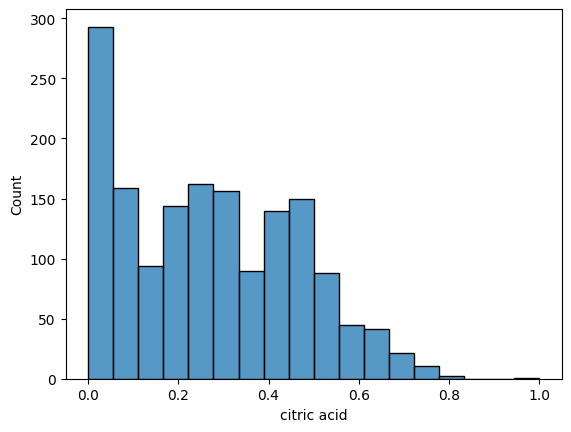

In [ ]:
sns.histplot( x=wine_clean_drop["citric acid"]) ;

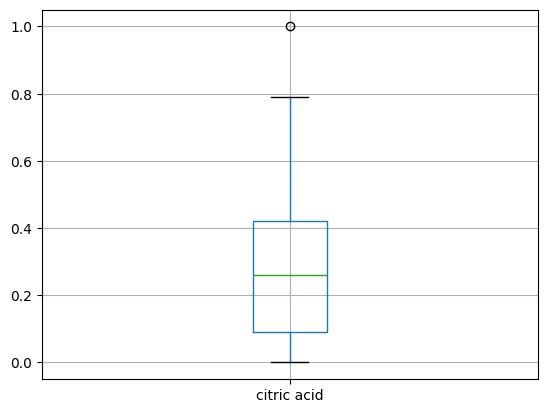

In [ ]:
wine_clean_drop.boxplot(column = 'citric acid') ;

## Plot the data (bivariate)

In [ ]:
# Column correlations
column_correlations = wine_clean_drop.corr()
column_correlations

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,alcohol,quality
fixed acidity,1.000000,-0.255847,0.672250,0.114539,0.093752,-0.154120,-0.113434,-0.683071,-0.062273,0.123706
volatile acidity,-0.255847,1.000000,-0.551587,0.002384,0.061311,-0.010040,0.076889,0.234470,-0.201580,-0.390147
citric acid,0.672250,-0.551587,1.000000,0.143810,0.199679,-0.061505,0.035056,-0.540297,0.110229,0.225720
residual sugar,0.114539,0.002384,0.143810,1.000000,0.055793,0.186718,0.202767,-0.085489,0.041325,0.013187
chlorides,0.093752,0.061311,0.199679,0.055793,1.000000,0.005725,0.047542,-0.264891,-0.221045,-0.128814
free sulfur dioxide,-0.154120,-0.010040,-0.061505,0.186718,0.005725,1.000000,0.667562,0.070671,-0.070268,-0.051241
total sulfur dioxide,-0.113434,0.076889,0.035056,0.202767,0.047542,0.667562,1.000000,-0.066344,-0.206482,-0.185646
pH,-0.683071,0.234470,-0.540297,-0.085489,-0.264891,0.070671,-0.066344,1.000000,0.206424,-0.057313
alcohol,-0.062273,-0.201580,0.110229,0.041325,-0.221045,-0.070268,-0.206482,0.206424,1.000000,0.475632
quality,0.123706,-0.390147,0.225720,0.013187,-0.128814,-0.051241,-0.185646,-0.057313,0.475632,1.000000


In [ ]:
type(column_correlations)

pandas.core.frame.DataFrame

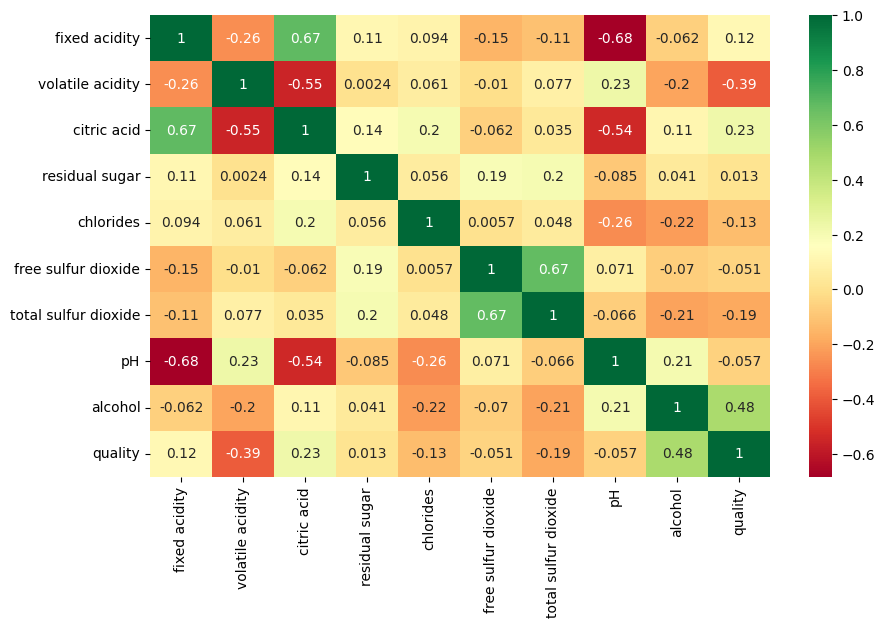

In [ ]:
# Correlation Plot
plt.figure(figsize=(10,6))
sns.heatmap(column_correlations, annot=True, cmap='RdYlGn') ;

In [ ]:
# Get most highly correlated varliables with alcohol
alc_correlations = column_correlations['alcohol']
alc_correlations

,alcohol
fixed acidity,-0.062273
volatile acidity,-0.201580
citric acid,0.110229
residual sugar,0.041325
chlorides,-0.221045
free sulfur dioxide,-0.070268
total sulfur dioxide,-0.206482
pH,0.206424
alcohol,1.000000
quality,0.475632


In [ ]:
correlated_vars = (
  alc_correlations
  .abs()
  .sort_values(ascending=False)
  .drop("alcohol")
)
correlated_vars

,alcohol
quality,0.475632
chlorides,0.221045
total sulfur dioxide,0.206482
pH,0.206424
volatile acidity,0.201580
citric acid,0.110229
free sulfur dioxide,0.070268
fixed acidity,0.062273
residual sugar,0.041325


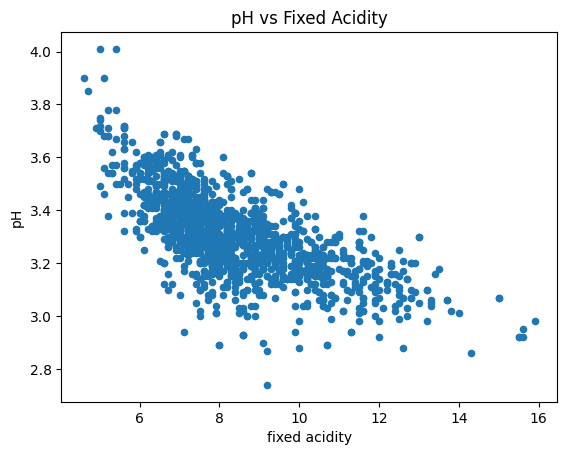

In [ ]:
# Scatter plot
wine_clean_drop.plot(x='fixed acidity', y='pH', kind='scatter',  title='pH vs Fixed Acidity') ;

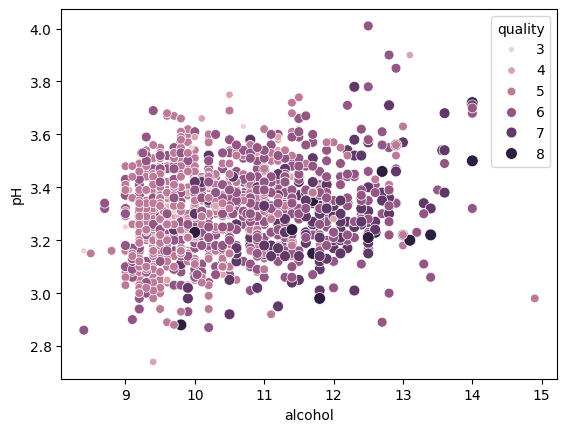

In [ ]:
# Scatter plot with different colors based on quality
sns.scatterplot(
    x    = wine_clean_drop['alcohol'],
    y    = wine_clean_drop['pH'],
    hue  = wine_clean_drop['quality'],
    size = wine_clean_drop['quality'],
) ;

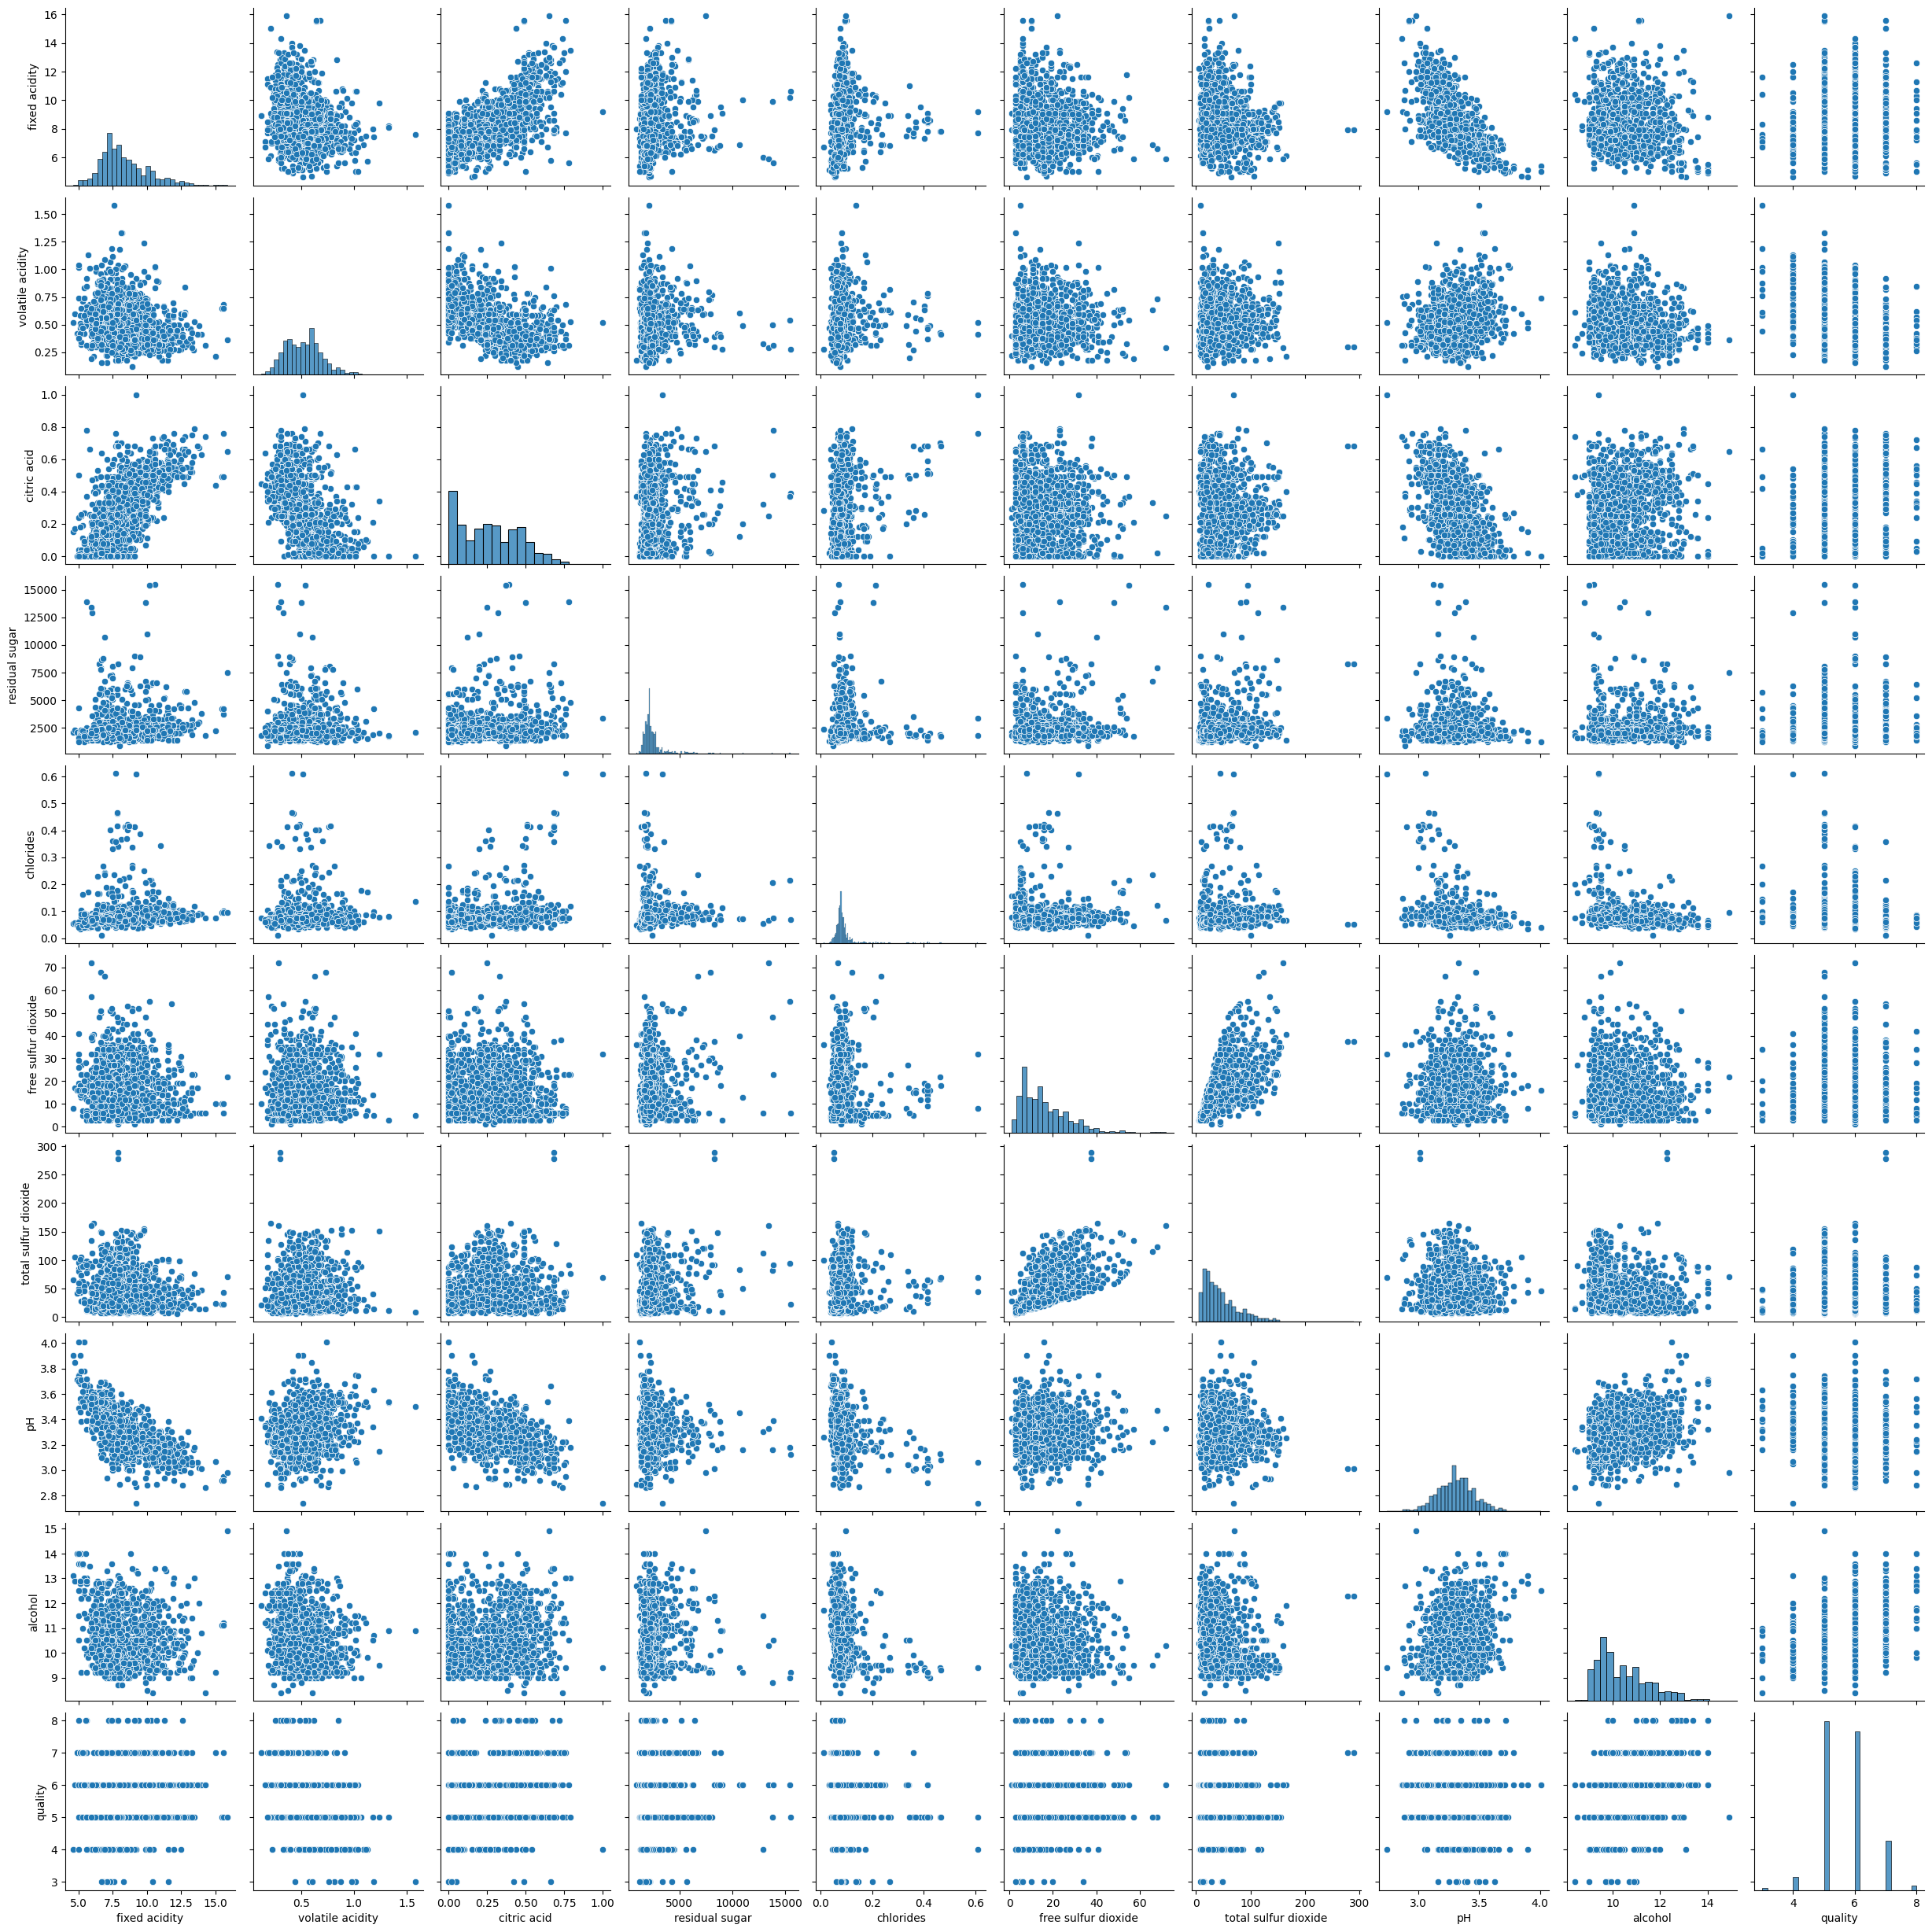

In [ ]:
# Pairplot
sns.pairplot(wine_clean_drop) ;

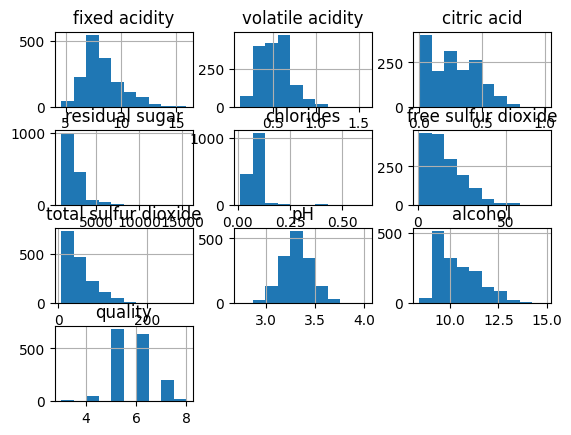

In [ ]:
wine_clean_drop.hist() ;